In [2]:
import pandas as pd

df = pd.read_csv('wfh.csv')

df.head()

,Month,Business Days,BU,AHT,Attrition Count,Attrition %,Shrink,Monthly System Outage (hours),Daily System Outage (hours),Monthly Sameday Callout (hours),...,Monthly Unplanned Out (hours),Daily Unplanned Out (hours),Monthly Planned Out (hours),Daily Planned Out (hours),Adherence,Conformance,ACW/ Call (seconds),AVG Hold Time (seconds),Monthly Processing-No Work (minutes),Daily Processing-No Work (minutes)
0,Jan-2019,21,RAM,853.0,4.0,4.49%,34.06%,0.0,0.0,1268.03,...,68.75,3.27,441.00,21.00,90.08%,94.03%,NaN,NaN,NaN,#VALUE!
1,Feb-2019,19,RAM,904.0,3.0,2.83%,34.85%,0.0,0.0,980.50,...,77.75,4.09,637.00,33.53,90.40%,93.44%,NaN,NaN,NaN,#VALUE!
2,Mar-2019,22,RAM,913.0,8.0,8.25%,34.99%,0.0,0.0,854.08,...,129.75,5.90,856.00,38.91,92.01%,94.89%,NaN,NaN,NaN,#VALUE!
3,Apr-2019,21,RAM,897.0,6.0,6.00%,27.08%,0.0,0.0,753.75,...,60.50,2.88,710.77,33.85,92.52%,95.79%,NaN,NaN,NaN,#VALUE!
4,May-2019,20,RAM,948.0,7.0,6.36%,36.20%,0.0,0.0,820.33,...,106.25,5.31,1155.98,57.80,92.17%,96.09%,NaN,NaN,NaN,#VALUE!


In [3]:
df.columns

Index(['Month', 'Business Days', 'BU', 'AHT', 'Attrition Count', 'Attrition %',
       'Shrink', 'Monthly System Outage (hours)',
       'Daily System Outage (hours)', 'Monthly Sameday Callout (hours)',
       'Daily Sameday Callout (hours)', 'Monthly Unplanned Out (hours)',
       'Daily Unplanned Out (hours)', 'Monthly Planned Out (hours)',
       'Daily Planned Out (hours)', 'Adherence', 'Conformance',
       'ACW/ Call (seconds)', 'AVG Hold Time (seconds)',
       'Monthly Processing-No Work (minutes)',
       'Daily Processing-No Work (minutes)'],
      dtype='object')

In [4]:
df.loc[:,'Attrition %':'Shrink'] = df[['Attrition %', 'Shrink']].replace(r'%', '', regex=True).astype('float') / 100.0

In [5]:
df.head()

,Month,Business Days,BU,AHT,Attrition Count,Attrition %,Shrink,Monthly System Outage (hours),Daily System Outage (hours),Monthly Sameday Callout (hours),...,Monthly Unplanned Out (hours),Daily Unplanned Out (hours),Monthly Planned Out (hours),Daily Planned Out (hours),Adherence,Conformance,ACW/ Call (seconds),AVG Hold Time (seconds),Monthly Processing-No Work (minutes),Daily Processing-No Work (minutes)
0,Jan-2019,21,RAM,853.0,4.0,0.0449,0.3406,0.0,0.0,1268.03,...,68.75,3.27,441.00,21.00,90.08%,94.03%,NaN,NaN,NaN,#VALUE!
1,Feb-2019,19,RAM,904.0,3.0,0.0283,0.3485,0.0,0.0,980.50,...,77.75,4.09,637.00,33.53,90.40%,93.44%,NaN,NaN,NaN,#VALUE!
2,Mar-2019,22,RAM,913.0,8.0,0.0825,0.3499,0.0,0.0,854.08,...,129.75,5.90,856.00,38.91,92.01%,94.89%,NaN,NaN,NaN,#VALUE!
3,Apr-2019,21,RAM,897.0,6.0,0.0600,0.2708,0.0,0.0,753.75,...,60.50,2.88,710.77,33.85,92.52%,95.79%,NaN,NaN,NaN,#VALUE!
4,May-2019,20,RAM,948.0,7.0,0.0636,0.3620,0.0,0.0,820.33,...,106.25,5.31,1155.98,57.80,92.17%,96.09%,NaN,NaN,NaN,#VALUE!


In [6]:
df=df.rename(columns = {'Month':'date'})

df.index = pd.to_datetime(df['date'])
df = df.drop('date', 1)

In [12]:
df.groupby([df.index.quarter, df.index.year]).mean()

Business Days         AHT  Attrition Count  Attrition %    Shrink  \
date date                                                                      
1    2019      20.666667  568.400000         6.888889     0.050772  0.301378   
     2020      20.333333  621.866667         5.476190     0.067857  0.285767   
2    2019      21.000000  589.333333         8.388889     0.070828  0.319061   
     2020      21.000000  677.000000         4.428571     0.084610  0.291200   
3    2019      21.333333  599.933333         7.222222     0.077250  0.318044   
     2020      21.333333  684.800000         4.952381     0.110157  0.299052   
4    2019      21.333333  614.866667         6.000000     0.046239  0.301394   
     2020      21.333333  646.533333         5.714286     0.060281  0.293333   

           Monthly System Outage (hours)  Daily System Outage (hours)  \
date date                                                               
1    2019                       4.020000                     0.190000   
     2020                      51.300833                     2.687500   
2    2019                       7.648333                     0.370000   
     2020                     193.210000                     9.206667   
3    2019                       1.860833                     0.087500   
     2020                     139.940000                     6.385000   
4    2019                      33.605833                     1.546667   
     2020                      36.946667                     1.710000   

           Monthly Sameday Callout (hours)  Daily Sameday Callout (hours)  \
date date                                                                   
1    2019                      1527.169333                      74.276000   
     2020                      1455.010000                      71.784000   
2    2019                      1080.413333                      51.679333   
     2020                       799.980667                      38.262000   
3    2019                      1019.223333                      47.725333   
     2020                       688.847000                      31.551000   
4    2019                      1314.758667                      61.496000   
     2020                       638.333333                      30.060000   

           Monthly Unplanned Out (hours)  Daily Unplanned Out (hours)  \
date date                                                               
1    2019                     117.928000                     5.729333   
     2020                     152.916667                     7.531333   
2    2019                     128.638667                     6.112667   
     2020                     122.854000                     5.862667   
3    2019                     101.816667                     4.759333   
     2020                     153.292000                     6.980000   
4    2019                     114.538667                     5.338667   
     2020                      30.333333                     1.426667   

           Monthly Planned Out (hours)  Daily Planned Out (hours)  \
date date                                                           
1    2019                   787.941333                  30.498667   
     2020                   877.672667                  35.474000   
2    2019                  1255.783333                  48.070000   
     2020                  1056.236667                  41.271333   
3    2019                  1063.313333                  37.300667   
     2020                  1482.217000                  53.187000   
4    2019                  1293.874667                  48.731333   
     2020                  1170.000000                  55.116667   

           ACW/ Call (seconds)  AVG Hold Time (seconds)  \
date date                                                 
1    2019           127.750000                71.975000   
     2020           126.825000                71.563333   
2    2019           114.445000                61.0

In [26]:
df.groupby([df.index.month, df.index.year, df['BU']]).mean()

Business Days    AHT  Attrition Count  Attrition %  Shrink  \
date date BU                                                                   
1    2019 RAM                21  853.0              4.0       0.0449  0.3406   
          RAM PD             21    NaN              0.0       0.0000  0.1419   
          RIS                21  585.0             10.0       0.0800  0.3200   
          RIS PD             21    NaN              NaN          NaN     NaN   
          RPS CT             21  316.0              2.0       0.0400  0.3400   
...                         ...    ...              ...          ...     ...   
12   2020 RIS                21  684.0              6.0       0.0800  0.3200   
          RIS PD             21    NaN              4.0       0.1300  0.1500   
          RPS CT             21  420.0              1.0       0.0300  0.2500   
          RPS PT             21  485.0              2.0       0.0300  0.3000   
          WISE               21  600.0             20.0       0.0700  0.3200   

                  Monthly System Outage (hours)  Daily System Outage (hours)  \
date date BU                                                                   
1    2019 RAM                              0.00                         0.00   
          RAM PD                            NaN                          NaN   
          RIS                              5.75                         0.27   
          RIS PD                            NaN                          NaN   
          RPS CT                            NaN                          NaN   
...                                         ...                          ...   
12   2020 RIS                               NaN                          NaN   
          RIS PD                            NaN                          NaN   
          RPS CT                            NaN                          NaN   
          RPS PT                            NaN                          NaN   
          WISE                              NaN                          NaN   

                  Monthly Sameday Callout (hours)  \
date date BU                                        
1    2019 RAM                             1268.03   
          RAM PD                              NaN   
          RIS                             1729.12   
          RIS PD                              NaN   
          RPS CT                           275.92   
...                                           ...   
12   2020 RIS                                 NaN   
          RIS PD                              NaN   
          RPS CT                              NaN   
          RPS PT                              NaN   
          WISE                                NaN   

                  Daily Sameday Callout (hours)  \
date date BU                                      
1    2019 RAM                             60.38   
          RAM PD                            NaN   
          RIS                             82.34   
          RIS PD                            NaN   
          RPS CT                          13.14   
...                                         ...   
12   2020 RIS                               NaN   
          RIS PD                            NaN   
          RPS CT                            NaN   
          RPS PT                            NaN   
          WISE                              NaN   

                  Monthly Unplanned Out (hours)  Daily Unplanned Out (hours)  \
date date BU                                                                   
1    2019 RAM                             68.75                         3.27   
          RAM PD                            NaN                          NaN   
          RIS                             78.25                         3.73   
          RIS PD                            NaN                          NaN   
          RPS CT                          28.50                         1.36   
...                   

Text(0.5, 1.0, 'AHT by Month and Year')

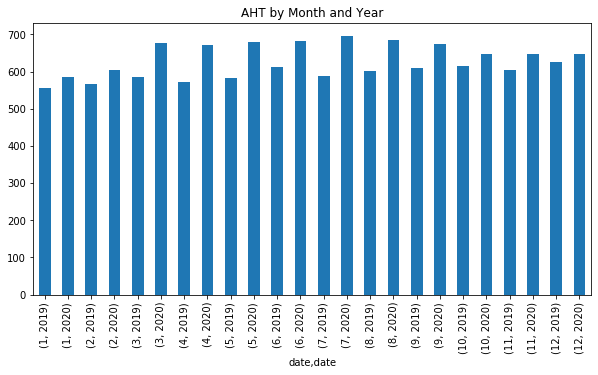

In [23]:
import matplotlib.pyplot as plt

df.groupby([df.index.month, df.index.year]).mean()['AHT'].plot(kind='bar',figsize=(10,5))

plt.title('AHT by Month and Year')

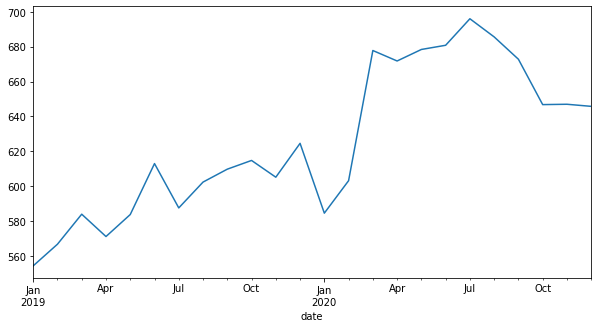

In [29]:
df.groupby([df.index]).mean()['AHT'].plot(figsize=(10,5))